In [415]:
import pandas as pd

data = pd.read_csv('mumbai_houses_task_filtred.csv')
data

,price,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,22400000,629,19.032800,72.896357,2,2,0,0,1,0,0,0,0
1,35000000,974,19.032800,72.896357,3,2,0,0,1,0,0,0,0
2,31700000,968,19.085600,72.909277,3,3,0,0,1,0,0,0,0
3,18700000,629,19.155756,72.846862,2,2,2,1,1,2,0,2,0
4,13500000,1090,19.177555,72.849887,2,2,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,19500000,810,19.138320,72.810020,2,2,0,1,0,0,2,0,0
6233,22000000,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,0
6234,20000000,750,19.144320,72.824111,2,2,0,1,0,0,0,0,0
6235,11000000,700,19.047201,72.872225,2,2,0,1,0,0,1,0,0


# Выделение целевого признака и предикторов

In [416]:
y = data['price']
y = (y / 86.38).astype(int)
X = data.drop(columns=["price"], axis=1)
y

0       259319
1       405186
2       366983
3       216485
4       156286
         ...  
6232    225746
6233    254688
6234    231535
6235    127344
6236    173651
Name: price, Length: 6237, dtype: int64

In [417]:
X

,area,latitude,longitude,bedrooms,bathrooms,balcony,status,neworold,parking,furnished_status,lift,type_of_building
0,629,19.032800,72.896357,2,2,0,0,1,0,0,0,0
1,974,19.032800,72.896357,3,2,0,0,1,0,0,0,0
2,968,19.085600,72.909277,3,3,0,0,1,0,0,0,0
3,629,19.155756,72.846862,2,2,2,1,1,2,0,2,0
4,1090,19.177555,72.849887,2,2,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6232,810,19.138320,72.810020,2,2,0,1,0,0,2,0,0
6233,1400,19.221920,72.854250,3,3,1,1,0,1,0,1,0
6234,750,19.144320,72.824111,2,2,0,1,0,0,0,0,0
6235,700,19.047201,72.872225,2,2,0,1,0,0,1,0,0


# Разбиение на обучающую и тестовую выборки

In [418]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4989, 12), (4989,), (1248, 12), (1248,))

# Использование моделей для обучения

In [419]:
# Импорт моделей обучения
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Импорт метрик качества
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [420]:
# Функция для отображения оценки предсказанных значений относительно реальных
from math import sqrt

def errors(predict_values, true_values=y_test):
    print(
        f'MAE = {mean_absolute_error(y_true=true_values, y_pred=predict_values)}',
        f'MSE = {mean_squared_error(y_true=true_values, y_pred=predict_values)}',
        f'RMSE = {sqrt(mean_squared_error(y_true=true_values, y_pred=predict_values))}',
        f'MAPE = {mean_absolute_percentage_error(y_true=true_values, y_pred=predict_values)}',
        f'R^2 = {r2_score(y_true=true_values, y_pred=predict_values)}',
        sep='\n'
    )

In [421]:
# Предсказания для тестовой выборки (Линейная регрессия)
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
errors(y_pred_lr)
lr.coef_

MAE = 101765.94715318634
MSE = 28624625174.980545
RMSE = 169188.1354438914
MAPE = 0.5002324825650244
R^2 = 0.6646184134384896


array([ 2.55218579e+02, -9.34972727e+05, -9.15643882e+05,  1.34458269e+03,
        9.49514492e+04, -1.25014640e+03, -6.56934172e+04,  3.51962272e+03,
       -1.25014640e+03,  5.95107255e+03, -1.25014640e+03, -5.41504782e+02])

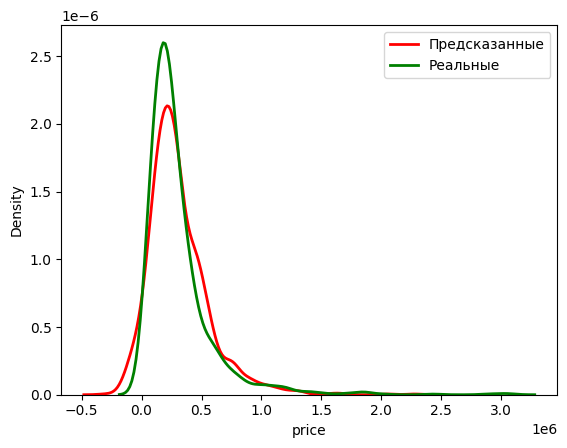

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(y_pred_lr, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [423]:
# Маштабирование данных

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [424]:
# L1 модель (Lasso)
lasso = Lasso(alpha=0.5, max_iter=50000).fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
errors(y_pred_lasso)
lasso.coef_

MAE = 101765.70596635484
MSE = 28624577310.841034
RMSE = 169187.99399142078
MAPE = 0.500229555639823
R^2 = 0.6646189742406293


array([ 1.65156257e+05, -1.03055396e+05, -5.35305261e+04,  1.01785363e+03,
        7.38890000e+04, -4.79716559e+03, -1.31458287e+03,  1.14839883e+03,
       -8.69760584e+01,  4.74676815e+03, -5.31602016e-04, -1.36501457e+02])

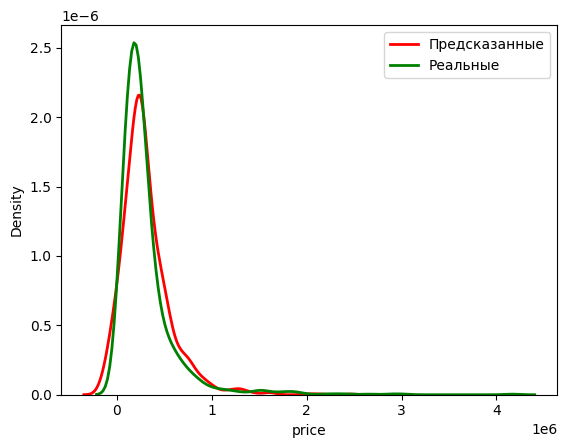

In [ ]:
sns.kdeplot(y_pred_lasso, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [ ]:
# L2 модель (Ridge)
ridge = Ridge(alpha=0.5, max_iter=50000).fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
errors(y_pred_ridge)
ridge.coef_

MAE = 103905.87172305006
MSE = 34488468649.95091
RMSE = 185710.71226493886
MAPE = 0.5141103928880426
R^2 = 0.6766632137409359


array([ 156823.5968784 , -104612.17991518,  -52464.01829184,
          8569.9155709 ,   64955.87189307,    -290.10549212,
          -994.39692968,    1223.82687509,    -290.10549212,
          3520.44127849,    -290.10549212,     954.54204972])

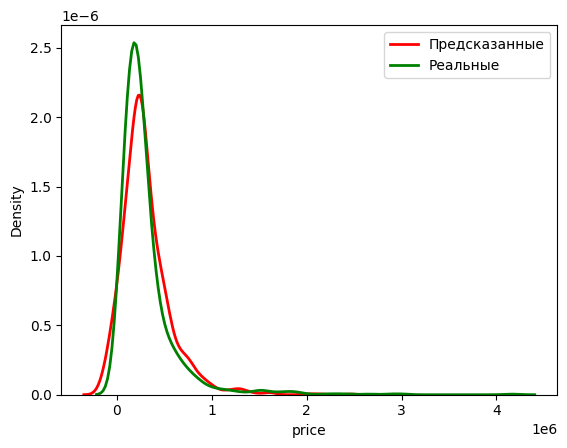

In [ ]:
sns.kdeplot(y_pred_ridge, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [ ]:
# Elastic Net (комбинация L1 и L2)
el = ElasticNet(alpha=0.5, max_iter=50000).fit(X_train, y_train)
y_pred_el = el.predict(X_test)
errors(y_pred_el)
el.coef_

MAE = 121272.40108551706
MSE = 44700880919.04176
RMSE = 211425.82841044225
MAPE = 0.6088986724628421
R^2 = 0.5809196596691265


array([   298.2129396 , -41319.26202208, -11626.2484128 ,  21001.65122365,
        54873.58287316,  -4336.43308056,   -171.67063644,   3098.64557019,
        -4336.28306068,   4674.46871333,  -4336.26806604,  -1521.28082118])

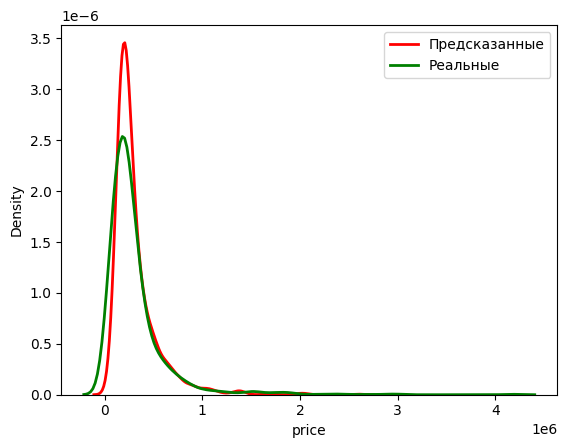

In [ ]:
sns.kdeplot(y_pred_el, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [ ]:
# Полиномиальная регрессия

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train_scaled)
X_test_p = poly.transform(X_test_scaled)
lr2 = LinearRegression().fit(X_train_p, y_train)
y_pred_p = lr2.predict(X_test_p)
errors(y_pred_p)
lr2.coef_

MAE = 86858.48035322211
MSE = 26376854137.376347
RMSE = 162409.52600563905
MAPE = 0.366803799877682
R^2 = 0.7527113385355975


array([ 1.14098105e+05, -9.67589052e+04, -7.41201773e+04,  3.11919152e+04,
        1.89726727e+04,  3.21316638e+03, -8.64081808e-01,  3.72887413e+02,
        3.21316638e+03,  2.60104785e+04,  3.21316638e+03,  8.61520452e+01,
       -5.45576293e+03, -4.76728018e+04, -4.24908488e+04,  1.63889231e+04,
        5.37901016e+03, -1.05087215e+03,  2.27988219e+03,  3.89944927e+03,
       -1.05087215e+03, -9.22736937e+03, -1.05087215e+03,  1.60256655e+04,
        4.57169018e+03,  3.42860257e+04, -6.13933146e+03, -2.79946251e+04,
        7.07558726e+02, -1.66046371e+03,  2.52446862e+03,  7.07558726e+02,
       -1.80143963e+03,  7.07558726e+02,  3.09684132e+03,  4.91876443e+03,
        1.18471416e+04, -1.28770536e+04, -6.85996303e+01, -1.36102590e+03,
        2.07214837e+02, -6.85996303e+01, -2.66476324e+02, -6.85996303e+01,
        9.60256677e+02, -5.07632597e+03, -7.66551629e+02,  2.57734151e+03,
        6.24020662e+02,  1.14862781e+03,  2.57734151e+03,  1.36966782e+03,
        2.57734151e+03, -

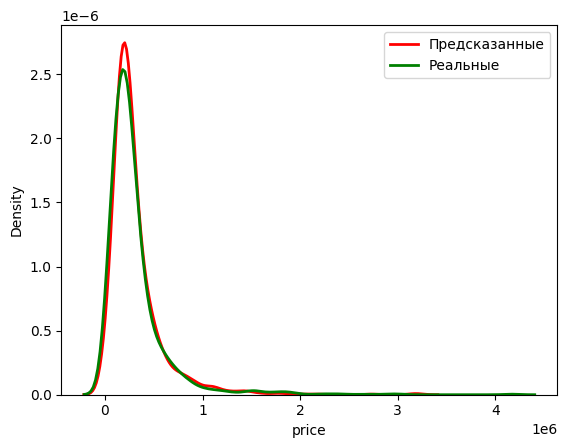

In [ ]:
sns.kdeplot(y_pred_p, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

In [ ]:
from ridge import ridge

my = ridge(alpha=0.3, n_iter=50000, learning_rate=0.01)
my.fit(X_train_scaled, y_train)
y_pred_my = my.predict(X_test_scaled)
errors(y_pred_my)
my.coef_()

Остановка на итерации 4723, grad_norm: 9.97557940495654e-07
MAE = 97883.73154997735
MSE = 37272411531.793076
RMSE = 193060.64210965703
MAPE = 0.41782690298047004
R^2 = 0.6505631524804621


array([109975.77845073, -83829.35407157, -41521.75978712,  37315.35828219,
        59944.57978176,   1288.29961057,   -395.21230444,   2039.20511491,
         1288.29961057,   2516.57304798,   1288.29961057,    138.45521287])

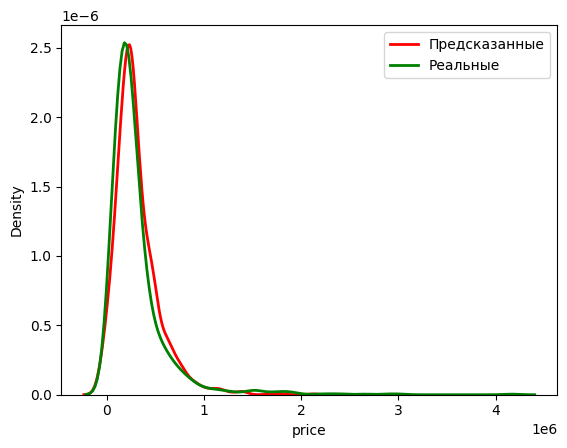

In [ ]:
sns.kdeplot(y_pred_my, color='red', label='Предсказанные', linewidth=2)
sns.kdeplot(y_test, color='green', label='Реальные', linewidth=2)
plt.legend()
plt.show()

# Поиск оптимального гиперпараметра для моделей 

In [ ]:
# Импорт методов для подбора гиперпараметра
from hyperparameter_search import hyperparameter_search
import numpy as np

In [ ]:
from hyperparameter_search import hyperparameter_search

models, methods = ('lasso', 'ridge', 'elasticnet'), ('GridSearchCV', 'RandomizedSearchCV')
parameters = {
    'lasso': {'alpha': np.arange(0.1, 10.1, 0.1)},
    'ridge': {'alpha': np.arange(0.1, 10.1, 0.1)},
    'elasticnet': {'alpha': np.arange(0.1, 10.1, 0.1), 'l1_ratio': np.arange(0.1, 1.1, 0.1)}
}

best_parameters = {}

for model in models:
    for method in methods:
        best_parameter = hyperparameter_search(model_name=model, method_search=method, parameters=parameters[model], X_train=X_train_scaled, y_train=y_train)
        best_parameters[f'{model}_{method}'] = best_parameter
        print(f'Лучший параметр для {model.capitalize()} методом {method}: {best_parameter}')

Лучший параметр для Lasso методом GridSearchCV: {'alpha': np.float64(10.0)}
Лучший параметр для Lasso методом RandomizedSearchCV: {'alpha': np.float64(9.3)}
Лучший параметр для Ridge методом GridSearchCV: {'alpha': np.float64(10.0)}
Лучший параметр для Ridge методом RandomizedSearchCV: {'alpha': np.float64(9.9)}
Лучший параметр для Elasticnet методом GridSearchCV: {'alpha': np.float64(0.2), 'l1_ratio': np.float64(0.9)}
Лучший параметр для Elasticnet методом RandomizedSearchCV: {'l1_ratio': np.float64(0.9), 'alpha': np.float64(1.9000000000000001)}


In [ ]:
# Optuna

from optuna_best_params import optuna

for model in models:
    best_parameter = optuna(model, X_train=X_train_scaled, y_train=y_train, X_test=X_test_scaled, y_test=y_test)
    best_parameters[f'{model}_optuna'] = best_parameter
    print(f'Лучший параметр для {model.capitalize()} методом optuna: {best_parameter}')

[I 2025-03-22 17:52:32,591] A new study created in memory with name: no-name-a1ae71c7-d20d-4855-8d38-889e8a7efd2c
[I 2025-03-22 17:52:32,597] Trial 0 finished with value: 34487091017.381325 and parameters: {'alpha': 56.21835810309986}. Best is trial 0 with value: 34487091017.381325.
[I 2025-03-22 17:52:32,602] Trial 1 finished with value: 34486891386.58964 and parameters: {'alpha': 77.67453406506719}. Best is trial 1 with value: 34486891386.58964.
[I 2025-03-22 17:52:32,606] Trial 2 finished with value: 34487545526.44202 and parameters: {'alpha': 13.34680244655047}. Best is trial 1 with value: 34486891386.58964.
[I 2025-03-22 17:52:32,611] Trial 3 finished with value: 34487599412.091415 and parameters: {'alpha': 8.707227532833953}. Best is trial 1 with value: 34486891386.58964.
[I 2025-03-22 17:52:32,616] Trial 4 finished with value: 34487649739.13203 and parameters: {'alpha': 4.052510143181348}. Best is trial 1 with value: 34486891386.58964.
[I 2025-03-22 17:52:32,620] Trial 5 finishe

Лучший параметр для Lasso методом optuna: 99.9873718211225


[I 2025-03-22 17:52:33,638] Trial 32 finished with value: 34501383795.17394 and parameters: {'alpha': 9.01413144309154}. Best is trial 23 with value: 34487720296.160904.
[I 2025-03-22 17:52:33,646] Trial 33 finished with value: 34501827990.90875 and parameters: {'alpha': 9.305802665988493}. Best is trial 23 with value: 34487720296.160904.
[I 2025-03-22 17:52:33,653] Trial 34 finished with value: 34489080534.997574 and parameters: {'alpha': 0.9048756407810435}. Best is trial 23 with value: 34487720296.160904.
[I 2025-03-22 17:52:33,661] Trial 35 finished with value: 34532534996.23957 and parameters: {'alpha': 29.293891353554198}. Best is trial 23 with value: 34487720296.160904.
[I 2025-03-22 17:52:33,668] Trial 36 finished with value: 34496579992.67387 and parameters: {'alpha': 5.854959963519006}. Best is trial 23 with value: 34487720296.160904.
[I 2025-03-22 17:52:33,675] Trial 37 finished with value: 34514309407.649124 and parameters: {'alpha': 17.47114812167176}. Best is trial 23 wit

Лучший параметр для Ridge методом optuna: 0.004617961442010099


[I 2025-03-22 17:52:34,361] Trial 20 finished with value: 79920892121.67935 and parameters: {'alpha': 79.82597584785674, 'l1_ratio': 0.8963578244426309}. Best is trial 12 with value: 34502781388.776306.
[I 2025-03-22 17:52:34,373] Trial 21 finished with value: 61759364267.874626 and parameters: {'alpha': 8.175582942360178, 'l1_ratio': 0.6048256802997348}. Best is trial 12 with value: 34502781388.776306.
[I 2025-03-22 17:52:34,387] Trial 22 finished with value: 36128519833.9124 and parameters: {'alpha': 0.7685714682752193, 'l1_ratio': 0.7615232981391997}. Best is trial 12 with value: 34502781388.776306.
[I 2025-03-22 17:52:34,400] Trial 23 finished with value: 35005940385.24318 and parameters: {'alpha': 16.41771376508741, 'l1_ratio': 0.9961921983203883}. Best is trial 12 with value: 34502781388.776306.
[I 2025-03-22 17:52:34,416] Trial 24 finished with value: 36107846007.681915 and parameters: {'alpha': 0.7692424636669736, 'l1_ratio': 0.764526972504982}. Best is trial 12 with value: 345

Лучший параметр для Elasticnet методом optuna: (0.027056940204256197, 0.9404037617536398)


In [ ]:
print(best_parameters)

{'lasso_GridSearchCV': {'alpha': np.float64(10.0)}, 'lasso_RandomizedSearchCV': {'alpha': np.float64(9.3)}, 'ridge_GridSearchCV': {'alpha': np.float64(10.0)}, 'ridge_RandomizedSearchCV': {'alpha': np.float64(9.9)}, 'elasticnet_GridSearchCV': {'alpha': np.float64(0.2), 'l1_ratio': np.float64(0.9)}, 'elasticnet_RandomizedSearchCV': {'l1_ratio': np.float64(0.9), 'alpha': np.float64(1.9000000000000001)}, 'lasso_optuna': 99.9873718211225, 'ridge_optuna': 0.004617961442010099, 'elasticnet_optuna': (0.027056940204256197, 0.9404037617536398)}


# Построение pipelines

In [ ]:
import importlib
import Pipeline
importlib.reload(Pipeline)
from Pipeline import RegressionPipeline

## 3.1. Простая линейная регрессия. Lasso-регрессия (L1-регуляризация). Ridgeрегрессия (L2-регуляризация). Elastic Net.

In [ ]:
X_simple_train = X_train.iloc[:, [0]]
X_simple_test  = X_test.iloc[:, [0]]

In [ ]:
model_type = ('linear', 'lasso', 'ridge', 'elasticnet')
model_scope = ('simple', 'multiply')

for type in model_type:
    model_pipe_simple = RegressionPipeline(model_scope='simple', model_type=type)
    model_pipe_simple.fit(X_simple_train, y_train)
    y_pred_pipe_simple = model_pipe_simple.predict(X_simple_test)
    print(f'\tМодель: {type}')
    errors(predict_values=y_pred_pipe_simple)
    print('-'*50)

	Модель: linear
MAE = 129117.18207101803
MSE = 48085806802.03343
RMSE = 219284.7619011258
MAPE = 0.6768557070965358
R^2 = 0.5491852539510806
--------------------------------------------------
	Модель: lasso
MAE = 129117.18308055394
MSE = 48085836041.47705
RMSE = 219284.82857114638
MAPE = 0.6768566757126939
R^2 = 0.5491849798250291
--------------------------------------------------
	Модель: ridge
MAE = 129117.22803599824
MSE = 48087140138.50028
RMSE = 219287.80207412422
MAPE = 0.6768998089680464
R^2 = 0.5491727536359008
--------------------------------------------------
	Модель: elasticnet
MAE = 135696.57721377278
MSE = 56074109843.452835
RMSE = 236799.72517605007
MAPE = 0.7786241047596745
R^2 = 0.4742932006305358
--------------------------------------------------


## 3.2. Множественная линейная регрессия. Lasso-регрессия (L1-регуляризация). Ridge-регрессия (L2-регуляризация). Elastic Net

In [ ]:
for type in model_type:
    model_pipe_multiply = RegressionPipeline(model_scope='simple', model_type=type)
    model_pipe_multiply.fit(X_train, y_train)
    y_pred_pipe_multiply = model_pipe_multiply.predict(X_test)
    print(f'\tМодель: {type}')
    errors(predict_values=y_pred_pipe_multiply)
    print('-'*50)

	Модель: linear
MAE = 103909.82176384573
MSE = 34487713321.61319
RMSE = 185708.67863838025
MAPE = 0.514160051047986
R^2 = 0.676670295106008
--------------------------------------------------
	Модель: lasso
MAE = 103909.27098295526
MSE = 34487698588.817924
RMSE = 185708.63897196038
MAPE = 0.5141533019386779
R^2 = 0.6766704332291216
--------------------------------------------------
	Модель: ridge
MAE = 103901.94536283214
MSE = 34489224328.92871
RMSE = 185712.74681326727
MAPE = 0.5140609515646821
R^2 = 0.6766561290885378
--------------------------------------------------
	Модель: elasticnet
MAE = 98289.53063278529
MSE = 39292648098.620155
RMSE = 198223.73243035295
MAPE = 0.4064074610526317
R^2 = 0.631623001625088
--------------------------------------------------


## 3.3. Полиномиальная регрессия.

In [ ]:
for i in range(2, 5):
    model_pipe_poly = RegressionPipeline(model_scope='polynomial', model_type='linear', poly_degree=i)
    model_pipe_poly.fit(X_train, y_train)
    y_pred_pipe_poly = model_pipe_poly.predict(X_test)
    print(f'Степень: {i}')
    errors(predict_values=y_pred_pipe_poly)
    print('-'*50)

Степень: 2
MAE = 86858.48035322211
MSE = 26376854137.376347
RMSE = 162409.52600563905
MAPE = 0.366803799877682
R^2 = 0.7527113385355975
--------------------------------------------------
Степень: 3
MAE = 85863.73070806601
MSE = 28996544566.012257
RMSE = 170283.71785350546
MAPE = 0.35328700684088005
R^2 = 0.7281511792317437
--------------------------------------------------
Степень: 4
MAE = 144417.01276625073
MSE = 344182373804.2281
RMSE = 586670.5837215874
MAPE = 0.4815532630503665
R^2 = -2.2267835305303834
--------------------------------------------------


# Собственные метрики

In [ ]:
import metrics
importlib.reload(metrics)
from metrics import mae, mse, r2_score_, mape, rmse

In [ ]:
models = [y_pred_lr, y_pred_ridge, y_pred_lasso, y_pred_el, y_pred_p]

original = {
    'r2': [],
    'mse': [],
    'rmse': [],
    'mae': [],
    'mape': []
}

custom = {
    'r2': [],
    'mse': [],
    'rmse': [],
    'mae': [],
    'mape': []
}


for model in models:
    original['r2'].append(r2_score(y_true=y_test, y_pred=model))
    original['mse'].append(mean_squared_error(y_true=y_test, y_pred=model))
    original['rmse'].append(sqrt(mean_squared_error(y_true=y_test, y_pred=model)))
    original['mae'].append(mean_absolute_error(y_true=y_test, y_pred=model))
    original['mape'].append(mean_absolute_percentage_error(y_true=y_test, y_pred=model))
    custom['r2'].append(r2_score_(y_true=y_test, y_pred=model))
    custom['mse'].append(mse(y_true=y_test, y_pred=model))
    custom['rmse'].append(rmse(y_true=y_test, y_pred=model))
    custom['mae'].append(mae(y_true=y_test, y_pred=model))
    custom['mape'].append(mape(y_true=y_test, y_pred=model))

In [ ]:
data_original = pd.DataFrame(
    {
        "R^2":  original['r2'],
        "MSE": original['mse'],
        "RMSE": original['rmse'],
        "MAE":  original['mae'],
        "MAPE": original['mape'],
    },
    index=['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Polynomial']
)

data_custom = pd.DataFrame(
    {
        "R^2":  custom['r2'],
        "MSE": custom['mse'],
        "RMSE": custom['rmse'],
        "MAE":  custom['mae'],
        "MAPE": custom['mape'],
    },
    index=['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Polynomial']
)

In [ ]:
# Оригинальные метрики

data_original

,R^2,MSE,RMSE,MAE,MAPE
Linear Regression,0.676670,3.448771e+10,185708.678638,103909.821764,0.514160
Ridge,0.676663,3.448847e+10,185710.712265,103905.871723,0.514110
Lasso,0.676670,3.448771e+10,185708.658149,103909.545959,0.514157
ElasticNet,0.580920,4.470088e+10,211425.828410,121272.401086,0.608899
Polynomial,0.752711,2.637685e+10,162409.526006,86858.480353,0.366804


In [ ]:
# Кастомные метрики

data_custom

,R^2,MSE,RMSE,MAE,MAPE
Linear Regression,0.676670,3.448771e+10,185708.678638,103909.821764,0.514160
Ridge,0.676663,3.448847e+10,185710.712265,103905.871723,0.514110
Lasso,0.676670,3.448771e+10,185708.658149,103909.545959,0.514157
ElasticNet,0.580920,4.470088e+10,211425.828410,121272.401086,0.608899
Polynomial,0.752711,2.637685e+10,162409.526006,86858.480353,0.366804


# ВЫВОД

После проделанной работы можно смело сказать сказать, что наилучшим образом себя показала модель полиномиальной регрессии. У неё наивысший коэффициент детерминации, что говорит о том, что модель довольно неплохо прогнозирует значения, а если взглянуть на график, то можно понять, что модель хорошо справляется, ведь плотности предсказанных и реальных значений близки, разве что на пике предсказанных значений больше, что следует из того, что среднее абсолютное значение равно 87к. Также можно заметить значение MAPE, которое объясняет, что модель в среднем ошибается примерно на 36%, звучит не очень, но можно заметить, что у нас есть выбросы значений price. 75 квантиль принимает значение 3.473020e+05, когда максимальное в свою очередь 4.167631e+06, это говорит о том, что после 3.473020e+05, т.е. высоких цен, не очень много, что как раз может влиять на нашу модель.